In [1]:
# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

When predicting Airbnb prices there will be a high level of seasonality since Berlin is the capital city of Germany and it has varying features which attract a huge range of different crowds. These events range from the Formula E Grand Prix to the Christopher Street Day, therefore leading to periods of very high demand where prices will rise considerably. Furthermore, Berlin has world-class artists performing from an array of different disciplines and genres combined with it being a cultural hotspot in Germany (place where the Wall fell) leads to relatively stable demand for accomodation.

In [2]:
df = pd.read_csv('listings_cleaned.csv')
pd.set_option('display.max_columns', len(df.columns))
df.head()

,Unnamed: 0,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,ID_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,tableware,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,time_since_first_review,time_since_last_review,bookings_per_month,occupancy_rate,occupancy_last_year,av_price_last_year,med_price_last_year
0,2015,2008-08-18,within an hour,90-99%,1.0,4.0,1.0,Brunnenstr. Süd,Mitte,Other,Entire home/apt,3,1.0,1.0,2.0,Real Bed,60,200,30,1,28,4,1125,141,118,2016-04-11,80-94/100,10/10,9/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,4,414.0,1000.0,423.0,5,0,1,2,1,3989.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2-3 years,2-6 months,7.605000,1.000000,0.613699,81.900709,76.0
1,2695,2008-09-16,unknown,unknown,0.0,1.0,1.0,Prenzlauer Berg Nordwest,Pankow,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,17,0,0,1,0,2,40,0,6,2018-07-04,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,flexible,1,0.0,1000.0,0.0,4,0,1,1,1,3960.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6-12 months,6-12 months,6.000000,0.394477,1.000000,NaN,NaN
2,3176,2008-10-19,within a day,100%,0.0,1.0,1.0,Prenzlauer Berg Südwest,Pankow,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,90,200,50,2,20,62,1125,220,143,2009-06-20,80-94/100,9/10,9/10,9/10,9/10,10/10,9/10,1,strict_14_with_grace_period,1,217.0,1000.0,476.0,6,1,1,1,1,3927.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4+ years,1+ year,0.490645,1.000000,0.397260,90.000000,90.0
3,3309,2008-11-07,unknown,unknown,0.0,1.0,1.0,Schöneberg-Nord,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,26,250,30,1,18,5,360,297,25,2013-08-12,80-94/100,9/10,9/10,9/10,10/10,9/10,9/10,0,strict_14_with_grace_period,1,433.0,1000.0,315.0,5,0,2,1,1,3908.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4+ years,6-12 months,6.084000,1.000000,0.186301,27.131313,26.0
4,7071,2009-05-16,within an hour,100%,1.0,1.0,1.0,Helmholtzplatz,Pankow,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,42,0,0,1,24,2,10,26,197,2009-08-18,95-100/100,10/10,10/10,10/10,10/10,10/10,9/10,0,moderate,1,62.0,1000.0,411.0,4,0,1,1,1,3718.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4+ years,2-6 months,15.210000,1.000000,0.928767,44.384615,44.0


In [3]:
#Converting the following columns to correct format to be enable plotting
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])

In [4]:
print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(df.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(df.host_since).strftime('%d %B %Y')}.")

Of the Airbnb hosts that are still listing on the site, the first joined on 18 August 2008, and the most recent joined on 06 November 2018.


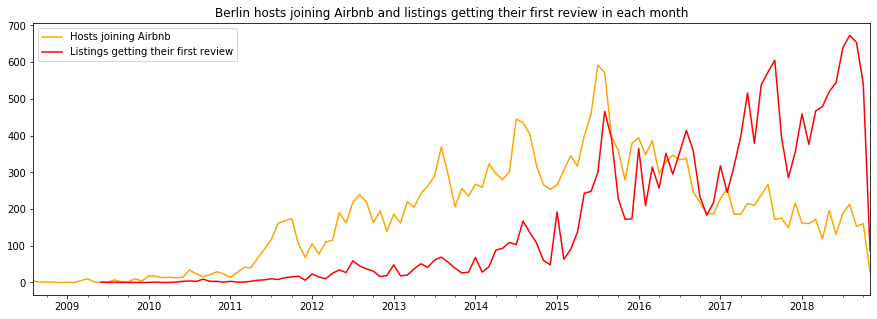

In [5]:
#Plotting these two columns
plt.figure(figsize=(15,5))
df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='red')
plt.title('Berlin hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2008-08-18', '2018-11-06') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [6]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(df.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(df.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    #plt.axvline(x='2015-06-01',color='r')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

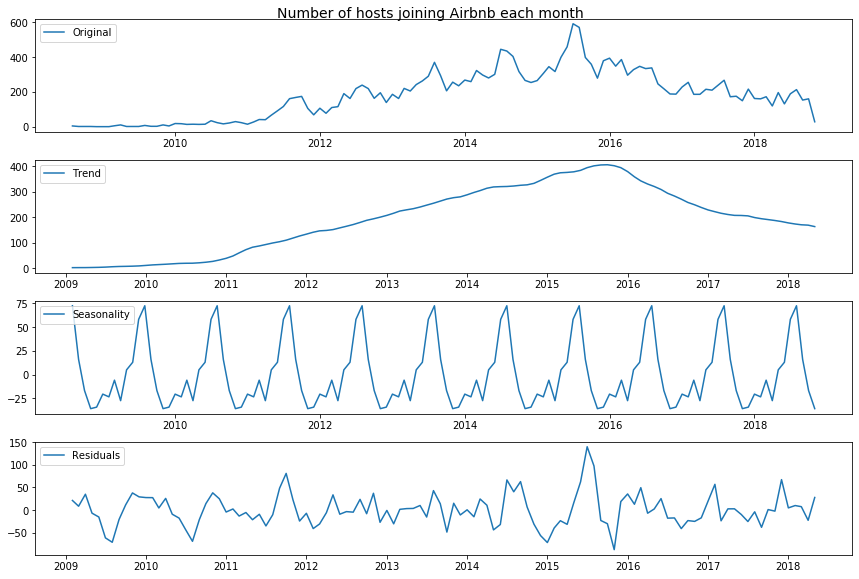

In [8]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

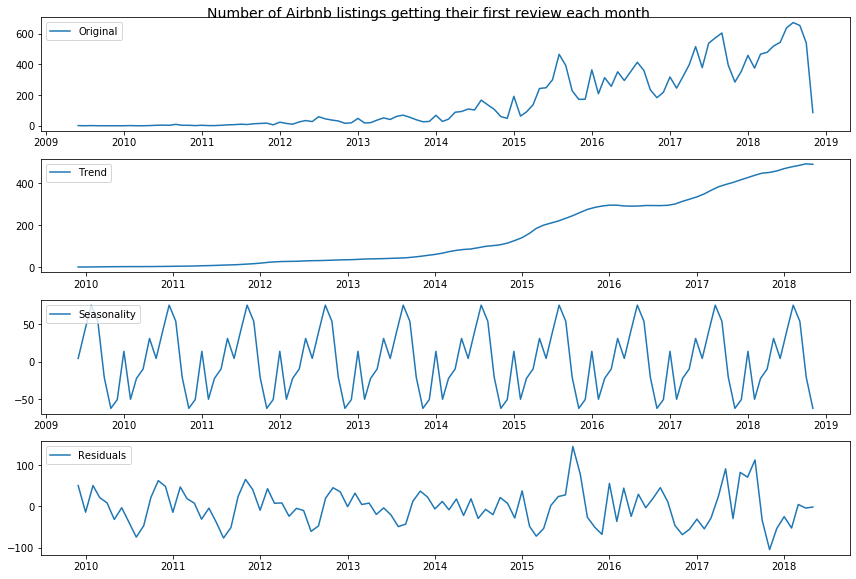

In [9]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')

As you can see above, there is clear seasonality in the number of hosts joining Airbnb each year. If you look at the first plot (orange & red lines) there is a clear peak in the summer and a clear trough each winter. Furthermore, we have added a vertical red line which indicates the passing of a rent control law which barred landlords from increasing rents by more than 10% above the local average. Furthermore, on 1 May 2016 owners could no longer rent whole properties to tourists, as officals blame websites including Airbnb, Wimdu and 9Flats for driving up rents. (https://www.theguardian.com/technology/2016/may/01/berlin-authorities-taking-stand-against-airbnb-rental-boom). After this point you can see a clear decrease number of hosts joining Airbnb, which is also reflected in the trend line.

Thus we will potentially need to include some dummies for this event as this will have had a significant effect on prices for Airbnb properties.

## Listing per owner

We will further look at listings per owner so see if there is trend in this area as well.

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


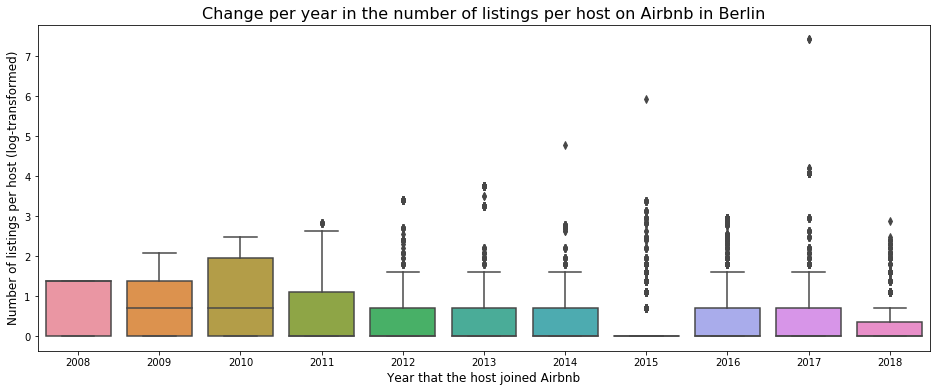

In [10]:
plt.figure(figsize=(16,6))
sns.boxplot(df.host_since.dt.year, np.log(df.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Berlin', fontsize=16)
plt.show()

Again we can see that after 2015 there is a clear reduction in change per year in the number of listings per host as it reduces significantly. 

In [11]:
print("Average number of listings per host per year on Airbnb in Berlin:")
print(round(df.set_index('host_since').host_listings_count.resample('YS').mean(),2))

Average number of listings per host per year on Airbnb in Berlin:
host_since
2008-01-01    2.71
2009-01-01    3.07
2010-01-01    3.89
2011-01-01    2.82
2012-01-01    2.23
2013-01-01    2.36
2014-01-01    1.54
2015-01-01    1.81
2016-01-01    2.17
2017-01-01    4.86
2018-01-01    1.70
Freq: AS-JAN, Name: host_listings_count, dtype: float64


There is a clear spike in the average number of listing in 2017 as Berlin cancelled the previously mentioned Airbnb implempented in 2016. (https://www.citylab.com/life/2018/03/berlin-airbnb-vacation-rental-regulation-law/556397/)

In [12]:
# List of the largest host_listings_count and the year the host joined Airbnb
df.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]

,host_since,host_listings_count
7771,2013-09-18,26.0
16795,2015-06-01,29.0
16706,2012-05-04,30.0
17573,2013-08-04,33.0
3921,2013-08-19,43.0
18446,2017-02-20,59.0
14073,2017-07-20,67.0
5299,2014-01-21,118.0
19254,2015-04-25,378.0
17926,2017-03-22,1676.0


## Price development throughout the years

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


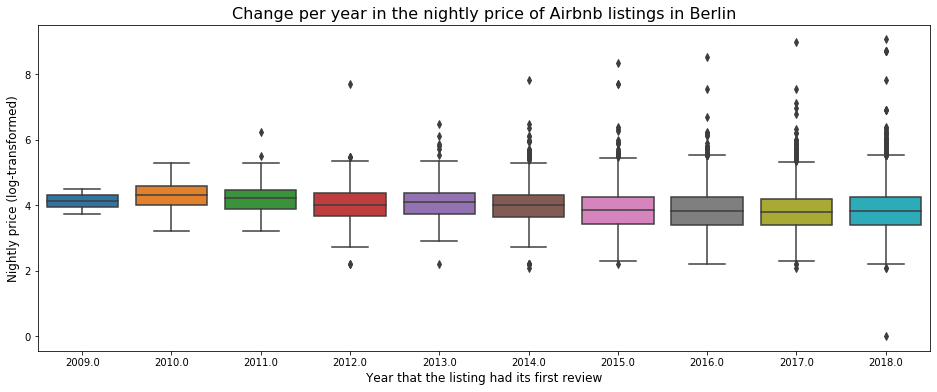

In [13]:
plt.figure(figsize=(16,6))
sns.boxplot(df.first_review.dt.year, np.log(df.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Berlin', fontsize=16)
plt.show()

In [14]:
print("Mean nightly price of listings in each year on Airbnb in Edinburgh:")
print(round(df.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in Edinburgh:
first_review
2009-01-01    66.00
2010-01-01    87.14
2011-01-01    77.17
2012-01-01    70.29
2013-01-01    68.52
2014-01-01    68.13
2015-01-01    59.54
2016-01-01    60.11
2017-01-01    57.92
2018-01-01    65.32
Name: price, dtype: float64


In [15]:
print("Median nightly price of listings in each year on Airbnb in Edinburgh:")
print(round(df.set_index('first_review').price.resample('YS').median(),2))

Median nightly price of listings in each year on Airbnb in Edinburgh:
first_review
2009-01-01    66
2010-01-01    75
2011-01-01    67
2012-01-01    55
2013-01-01    60
2014-01-01    54
2015-01-01    47
2016-01-01    45
2017-01-01    44
2018-01-01    45
Name: price, dtype: int64


In term of changes in prices over time, the average price per night for Airbnb listings in Berlin has stayed constant over the last 9 years. Over the years we can see that the median price diverges from the mean price, which starts around the time the ban was implemented. The mean price in 2009 was $66 and the median £66, whereas the mean price in 2018 was £65 and the median £45.

In [16]:
# Dropping host_since and first_review as they are no longer needed
df.drop(['host_since', 'first_review'], axis=1, inplace=True)

## Numerical Features of Data

In [17]:
df.describe()

,Unnamed: 0,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,ID_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,tableware,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,bookings_per_month,occupancy_rate,occupancy_last_year,av_price_last_year,med_price_last_year
count,2.252600e+04,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,2.252600e+04,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,22526.000000,11749.000000,11749.000000
mean,1.572272e+07,0.133668,2.330685,0.386309,2.637530,1.092582,1.161103,1.619329,66.771020,118.190136,18.172556,1.332194,8.260677,7.159061,1.031683e+05,79.929859,17.853503,0.312084,1.919293,297.981044,700.699503,166.717482,3.922268,0.210956,1.056113,0.878008,0.992764,1602.455829,0.472609,0.454675,0.286469,0.137708,0.367353,0.161857,0.953876,0.225606,0.838409,0.215839,0.178505,0.392391,0.295747,0.138151,0.203543,0.114534,0.219080,6.393423,0.506756,0.781014,72.333325,71.497830
std,8.552949e+06,0.340303,19.947823,0.486914,1.510914,0.329778,0.646011,1.174058,212.201084,303.282497,24.898482,0.835271,11.151845,40.683396,9.646081e+06,119.394700,36.779486,0.463354,3.669240,148.335112,328.954694,239.811624,2.091502,0.407996,0.378505,0.839818,0.084759,697.468079,0.499260,0.497952,0.452121,0.344600,0.482095,0.368328,0.209759,0.417990,0.368083,0.411413,0.382946,0.488294,0.456388,0.345067,0.402642,0.318466,0.413632,7.353029,0.412492,0.327109,62.480230,61.987035
min,2.015000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,257.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000
25%,8.077258e+06,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,30.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000e+01,0.000000,1.000000,0.000000,1.000000,205.000000,417.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1109.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.098619,0.646575,38.000000,38.000000
50%,1.688213e+07,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,45.000000,0.000000,10.000000,1.000000,5.000000,2.000000,1.124000e+03,4.000000,5.000000,0.000000,1.000000,272.500000,851.000000,29.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1545.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.427350,0.989041,55.000000,55.000000
75%,2.259224e+07,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,70.000000,150.000000,30.000000,1.000000,15.000000,4.000000,1.125000e+03,129.000000,16.000000,1.000000,

## Price Distribution

In [18]:
df.loc[df.price <= 10, 'price'].count()

61

In [19]:
print(f"Advertised prices range from ${min(df.price)} to ${max(df.price)}.")

Advertised prices range from $0 to $8600.


The price distribution shows that prices range from 0 to 8600 dollars. The outliers of the range are most likely because  hosts did not understand how to use the Airbnb advertised prices correctly. The advertised prices can be set to any arbitrary amount, and these are the prices that show when dates are not entered on the site. Once you enter the dates you want to occupy the property, prices can vary a lot.

Unfortunately this model will be predicting advertised prices rather than the prices that were actually paid. However, we will clean the less useful values, these include small values under 10 (of which there are 61) will be increased to 10. Since there are only 61 this transformation shouldn't skew our results.

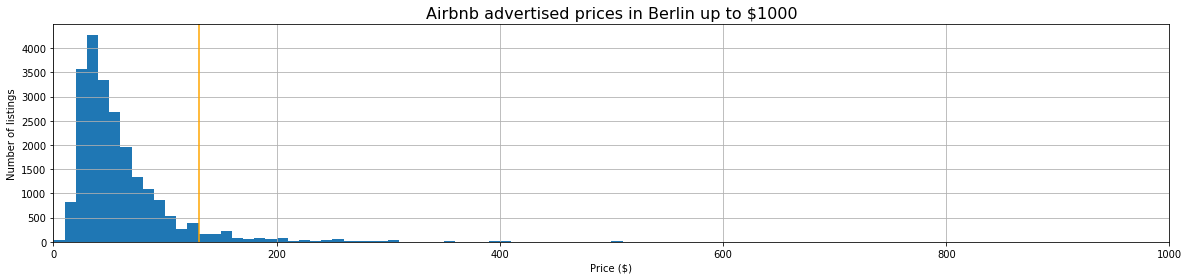

In [20]:
# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(130, color='orange')
plt.title("Airbnb advertised prices in Berlin up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

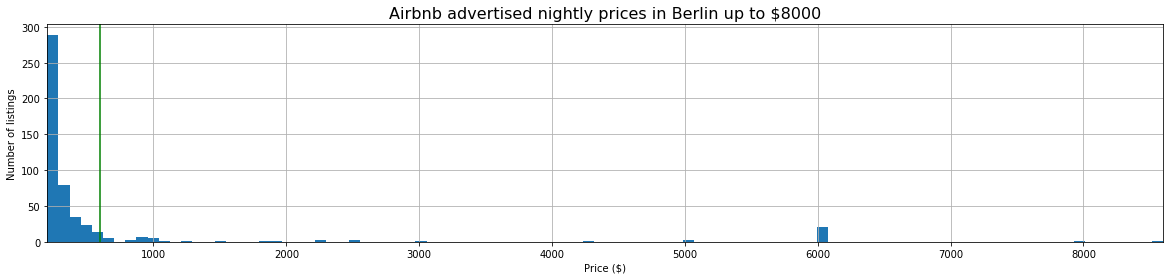

In [21]:
# Distribution of prices from £200 upwards
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(200, max(df.price)))
plt.margins(x=0)
plt.axvline(600, color='green')
plt.title("Airbnb advertised nightly prices in Berlin up to $8000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

As you can see above there are notable declines in prices at 130(first graph, orange line) and 600(second graph, green line).

Further we will reduce values above 1000 to 1000 so that they will likely reflect the actual paid price more realistically.

In [22]:
# Replacing values under £10 with £10
df.loc[df.price <= 10, 'price'] = 10

# Replacing values over £1000 with £1000
df.loc[df.price >= 1000, 'price'] = 1000

## Host Listings Count

Now we will investigate the number of listings per host in more detail to get an idea of how many listings hosts have on average and how many hosts have multiple listings. 

As you can see below the median number of listings per host is 1 and about 72% of hosts only list one property. The mean number of listings per host is 2, thus the data is not too skewed which would have happened if there were a few hosts with a large number of listings. This is likely because of the Airbnb law mentioned previously.

However, there may still be an issue for the number of listings per host: hosts could have listings in other cities as well which is not captured in this dataset
  

In [23]:
print("Median number of listings per host:", int(df.host_listings_count.median()))
print("Mean number of listings per host:", int(round(df.host_listings_count.mean())))
print(f"{int(round(100*len(df[df.host_listings_count == 1])/len(df)))}% of listings are from hosts with one listing.")

Median number of listings per host: 1
Mean number of listings per host: 2
72% of listings are from hosts with one listing.


## Number of people accomodated, bedrooms, bathrooms and beds

We go on to inspect the averge number of people accomodated, bathrooms, bedrooms and beds and how prices differ depending on this features

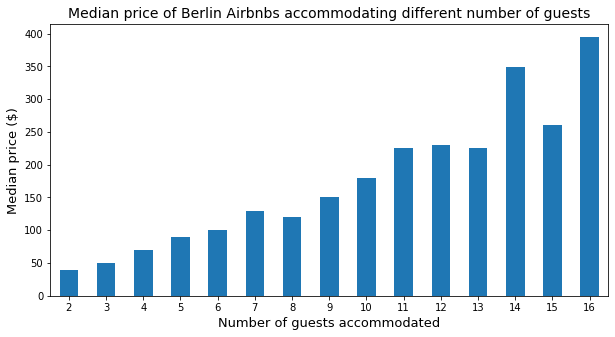

In [24]:
plt.figure(figsize=(10,5))
df.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Berlin Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

In [25]:
df[['accommodates','bathrooms','bedrooms','beds']].describe()

,accommodates,bathrooms,bedrooms,beds
count,22526.000000,22526.000000,22526.000000,22526.000000
mean,2.637530,1.092582,1.161103,1.619329
std,1.510914,0.329778,0.646011,1.174058
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000
75%,3.000000,1.000000,1.000000,2.000000
max,16.000000,8.500000,12.000000,22.000000


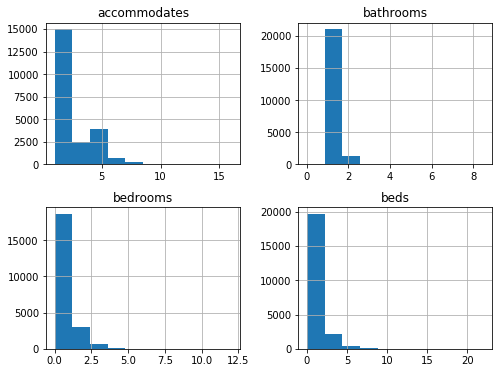

In [26]:
df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

As you can see above, most properites accomodate two people in one bedroom with one bathroom. 

Certain properties have extreme values for some characteristics, for exmaple one proprty claims to have 8.5 bathrooms (probably one bathroom without a toilet), but for now we will leave these outliers in our dataset

## Categorical Features

Now we will have a more in-depth look at some categorical variables to see which ones we show maintain for out final model and which ones have less added value. 

### Neighbourhood

We will inspect which neighbourhoods which contain the most the most Airbnb properties and their respective price ranges.

In [27]:
import geopandas as gpd
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [28]:
# Importing the Berlin neighbourhood boundary GeoJSON file as a dataframe in geopandas
map_df = gpd.read_file('neighbourhoods.geojson')

# Renaming the neighbourhood column
df.rename(columns={'neighbourhood_cleansed': 'borough'}, inplace=True)

map_df.isna().sum()

neighbourhood          2
neighbourhood_group    2
geometry               0
dtype: int64

In [29]:
# Dropping the empty column
#map_df.drop('neighbourhood_group', axis=1, inplace=True)

In [30]:
# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(df.groupby('borough').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['median_price'] = df.groupby('borough').price.median().values
borough_df

,number_of_listings,median_price
borough,,
Adlershof,27,40.0
Albrechtstr.,102,40.0
Alexanderplatz,1089,68.0
Allende-Viertel,3,26.0
Alt Treptow,169,44.0
...,...,...
Wilhelmstadt,33,36.0
Zehlendorf Nord,66,57.5
Zehlendorf Südwest,40,64.5


In [31]:
# Joining the dataframes
borough_map_df = map_df.set_index('neighbourhood').join(borough_df)

# Having a look at the newly created dataframe and sorting by number of listings in a borough
borough_map_df.sort_values('number_of_listings').tail(10)

,neighbourhood_group,geometry,number_of_listings,median_price
Neuköllner Mitte/Zentrum,Neukölln,"MULTIPOLYGON (((13.44810 52.46457, 13.44821 52...",795.0,37.0
Rixdorf,Neukölln,"MULTIPOLYGON (((13.45859 52.48552, 13.45844 52...",880.0,35.0
Reuterstraße,Neukölln,"MULTIPOLYGON (((13.43515 52.48076, 13.43492 52...",999.0,43.0
Alexanderplatz,Mitte,"MULTIPOLYGON (((13.40559 52.52967, 13.40721 52...",1089.0,68.0
Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg,"MULTIPOLYGON (((13.46965 52.50223, 13.46954 52...",1280.0,47.0
Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,"MULTIPOLYGON (((13.40736 52.48605, 13.40703 52...",1322.0,50.0
Forst Grunewald,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.23830 52.46917, 13.23777 52...",NaN,NaN
Marzahn-Nord,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.54447 52.56685, 13.54458 52...",NaN,NaN
NaN,None,"MULTIPOLYGON (((13.61659 52.58154, 13.61458 52...",NaN,NaN
NaN,None,"MULTIPOLYGON (((13.61668 52.57868, 13.60703 52...",NaN,NaN


In [32]:
#Sorting the dataframe according to median price
borough_map_df.sort_values('median_price').tail(10)

,neighbourhood_group,geometry,number_of_listings,median_price
Alexanderplatz,Mitte,"MULTIPOLYGON (((13.40559 52.52967, 13.40721 52...",1089.0,68.0
Kurfürstendamm,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30611 52.50191, 13.30552 52...",121.0,70.0
Rahnsdorf/Hessenwinkel,Treptow - Köpenick,"MULTIPOLYGON (((13.73141 52.41976, 13.73134 52...",29.0,75.0
Regierungsviertel,Mitte,"MULTIPOLYGON (((13.39724 52.52200, 13.39666 52...",213.0,79.0
Spandau Mitte,Spandau,"MULTIPOLYGON (((13.24667 52.52832, 13.24636 52...",20.0,95.5
Haselhorst,Spandau,"MULTIPOLYGON (((13.21109 52.54379, 13.21234 52...",3.0,210.0
Forst Grunewald,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.23830 52.46917, 13.23777 52...",NaN,NaN
Marzahn-Nord,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.54447 52.56685, 13.54458 52...",NaN,NaN
NaN,None,"MULTIPOLYGON (((13.61659 52.58154, 13.61458 52...",NaN,NaN
NaN,None,"MULTIPOLYGON (((13.61668 52.57868, 13.60703 52...",NaN,NaN


In [33]:
#Might need to pip install descartes first
import descartes

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


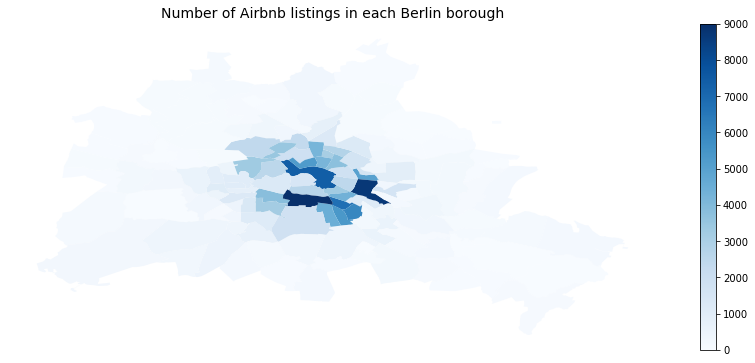

In [34]:
# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each Berlin borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


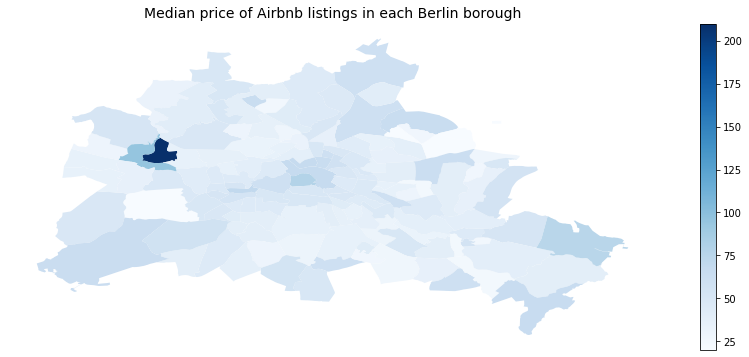

In [35]:
# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each Berlin borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

Tempelhofer Vorstadt has the most Airbnb properties, followed by Frankfurter Allee Süd FK. However, these boroughs only have very few listings (3 and 20 respectively), thus potentially skewing the price data. As you can see on the first map above, Airbnb listings are very concentrated in the center of Berlin, with few listings outside the central circle.

The pattern with prices is completely different. As you can see on the second map above Haselhorst and Spandau mitte are the most expensive areas(located in the west of Berlin). In general the outer boroughs of Berlin are more expensive, probably because these properties are a little more spacious, although there isn't as high a price variation as in other major cities, most likely due to the rent Airbnb laws enacted in 2015.

Due to the abundance of properties in the centre of Berlin, the median price of these properties isn't too high as supply seams to balance demand to a certain degree.

## Property and room types

Here we will have a short look at the most common property and room types

In [36]:
#Defining a function to count & plot the columns we specify
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

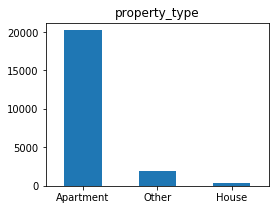

Apartment    0.896786
Other        0.085590
House        0.017624
Name: property_type, dtype: float64


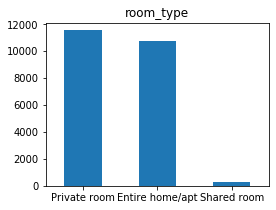

Private room       0.511453
Entire home/apt    0.475406
Shared room        0.013140
Name: room_type, dtype: float64


In [37]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(df[col].value_counts(normalize=True))

As you can see above, the most common property type is an apartment with almost 90% of the listings being an apartment. Next is the category 'other' which includes properties such as Hostels, Houseboats and Resorts. Least common are houses with less than 2%.

About 50% of the properties are a private room, with the other half roughly being entire properties. The least commonn are shared rooms with less than 2%.

## Reviews

We inspect what the distribution of the reviews looks like

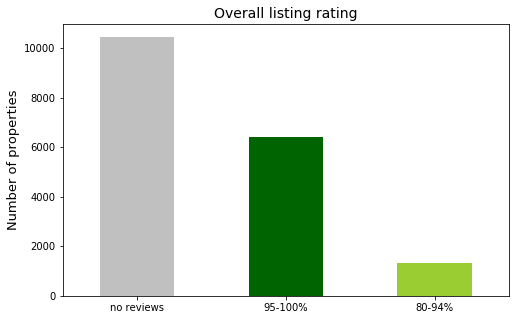

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
df['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a' ], ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

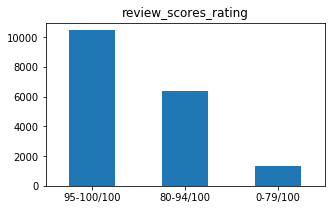

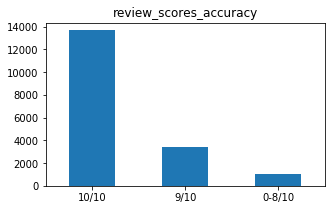

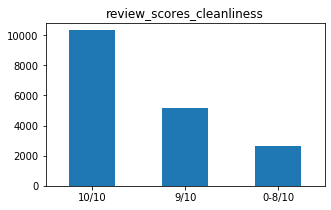

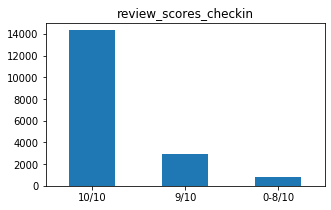

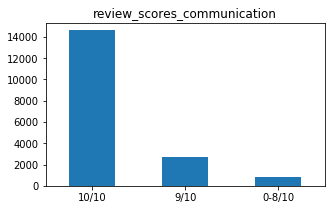

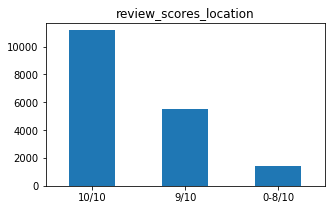

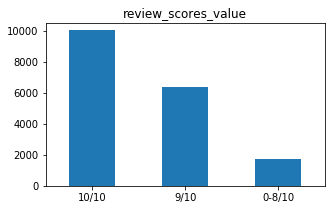

In [39]:
for col in list(df.columns[df.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

For every review category the majority of listings received a 10/10 rating (or 95-100). It is clear that people love the Airbnb, with few ratings being less than 8 (usually around 5-10% of each review category). 

However, around half of listings do not have an overall listings review. We could potential give an equal weight to each review category and then compute the overall review score (consult with group) to enhance our data, but this may give a skewed analysis (think of advantages/disadvantages).

## First and Last Reviews

In [40]:
df['time_since_last_review'].isna().sum()

3897

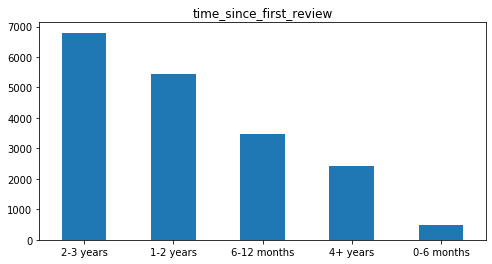

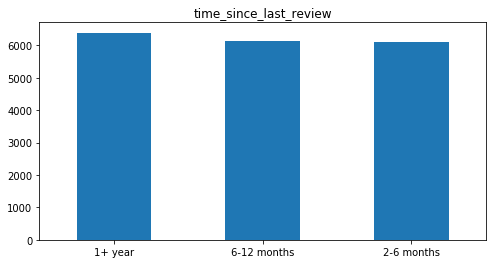

In [41]:
for col in ['time_since_first_review', 'time_since_last_review']:
    category_count_plot(col)

As you can see above the most common time period in which Airbnb listings has their first review is 2-3 years, indicating that most listings have been active for quite a time. Very few listings have been introuced recently (less than 1000) and around 10% of listings have been active for more than 4 years. 

The time since last review chart shows that there is a very even distribution between the time listings had their last review. This shows that lisitngs aren't reviewed too often which may mean they aren't used as often or for longer periods at a time. These are known as inactive listings becasue although they are on the Airbnb site, they do not have their calendars open and are unavailable.

# Boolean features

In this section we take a closer look at the Boolean features of this dataset, comparing the true/false features to the median price in each category to find out if certain features are worth including in our analysis.

In [42]:
#Below is a function which plots Plots a simple bar chart of the counts of true and false categories in the column 
#specified, next to a bar chart of the median price for each category. A figure size can optionally be specified
def binary_count_and_price_plot(col, figsize=(8,3)):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price (£)')
    ax2.set_xlabel('')
    
    plt.show()

## Superhosts

Here we have a look at hosts which may be superhosts and if it is worth being one.

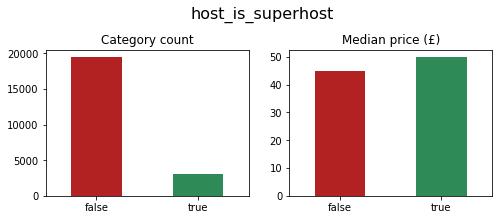

0.0    0.866332
1.0    0.133668
Name: host_is_superhost, dtype: float64


In [43]:
binary_count_and_price_plot('host_is_superhost')
print(df.host_is_superhost.value_counts(normalize=True))

About 13% of hosts are superhosts and it there clearly is a difference in the median price if a host is a superhost or not so this category will be retained for our model.

## Host Verification

We want to find out if being a verified hosts can be financially beneficial and therefore guests would pay a premium to ensure that their host has proven to be a good host in the past according to previous' guests validation.

In [44]:
df.host_identity_verified.value_counts(normalize=True)

0.0    0.613691
1.0    0.386309
Name: host_identity_verified, dtype: float64

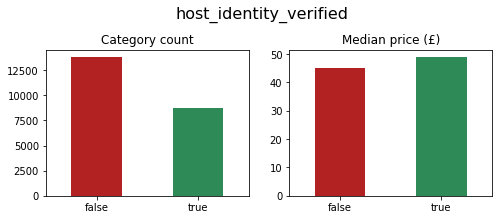

In [45]:
binary_count_and_price_plot('host_identity_verified')

About 39% of hosts are verified (e.g. by providing ID and verifying your phone number and email address), although it is something that hosts often think they are expected to do. 

As one might expect the additional trust commanded by verified hosts results in higher nightly prices, there is a discernable difference between the median nightly prices of listings with verified and unverified hosts. 

Therefore we will leave this column in the dataframe for our model.

## Instant Booking

Next we look at if properties are immmediately bookable (i.e. booking a listing without messaging the host first) and if it has any affect on the price of a property.

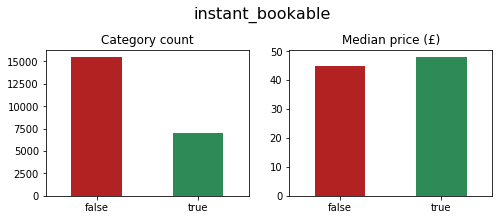

0    0.687916
1    0.312084
Name: instant_bookable, dtype: float64


In [46]:
binary_count_and_price_plot('instant_bookable')
print(df.instant_bookable.value_counts(normalize=True))

Around 31% of properties are instant bookable and again there is an effect on on the median price per night of a listing. Thus to ensure that we are not missing any potential significant variables we will keep this variable for our model.

## Amenties

Lastly we will inspect which amenities are most common and which have the strongest effect on price. 

In [47]:
df.head()

,Unnamed: 0,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,borough,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,ID_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,tableware,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,time_since_first_review,time_since_last_review,bookings_per_month,occupancy_rate,occupancy_last_year,av_price_last_year,med_price_last_year
0,2015,within an hour,90-99%,1.0,4.0,1.0,Brunnenstr. Süd,Mitte,Other,Entire home/apt,3,1.0,1.0,2.0,Real Bed,60,200,30,1,28,4,1125,141,118,80-94/100,10/10,9/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,4,414.0,1000.0,423.0,5,0,1,2,1,3989.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2-3 years,2-6 months,7.605000,1.000000,0.613699,81.900709,76.0
1,2695,unknown,unknown,0.0,1.0,1.0,Prenzlauer Berg Nordwest,Pankow,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,17,0,0,1,0,2,40,0,6,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,flexible,1,0.0,1000.0,0.0,4,0,1,1,1,3960.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6-12 months,6-12 months,6.000000,0.394477,1.000000,NaN,NaN
2,3176,within a day,100%,0.0,1.0,1.0,Prenzlauer Berg Südwest,Pankow,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,90,200,50,2,20,62,1125,220,143,80-94/100,9/10,9/10,9/10,9/10,10/10,9/10,1,strict_14_with_grace_period,1,217.0,1000.0,476.0,6,1,1,1,1,3927.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4+ years,1+ year,0.490645,1.000000,0.397260,90.000000,90.0
3,3309,unknown,unknown,0.0,1.0,1.0,Schöneberg-Nord,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,26,250,30,1,18,5,360,297,25,80-94/100,9/10,9/10,9/10,10/10,9/10,9/10,0,strict_14_with_grace_period,1,433.0,1000.0,315.0,5,0,2,1,1,3908.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4+ years,6-12 months,6.084000,1.000000,0.186301,27.131313,26.0
4,7071,within an hour,100%,1.0,1.0,1.0,Helmholtzplatz,Pankow,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,42,0,0,1,24,2,10,26,197,95-100/100,10/10,10/10,10/10,10/10,10/10,9/10,0,moderate,1,62.0,1000.0,411.0,4,0,1,1,1,3718.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4+ years,2-6 months,15.210000,1.000000,0.928767,44.384615,44.0


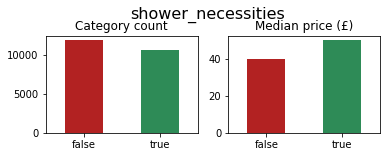

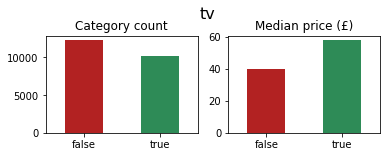

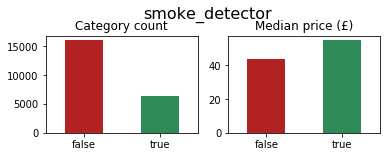

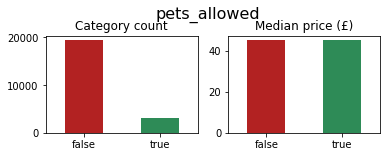

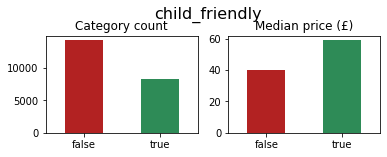

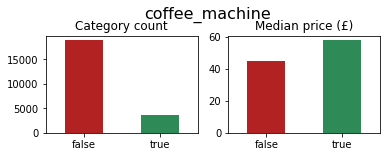

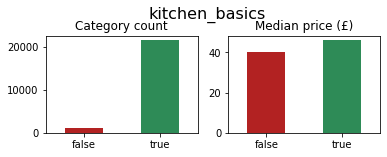

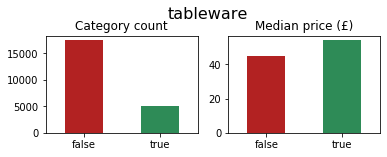

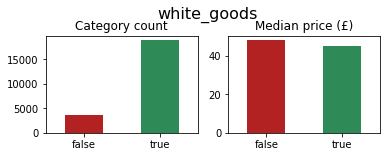

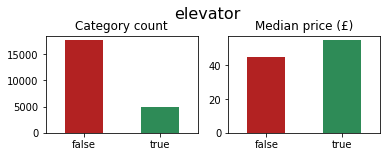

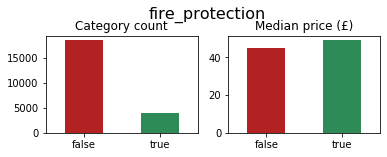

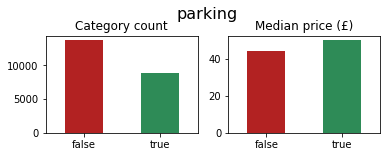

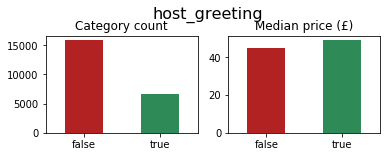

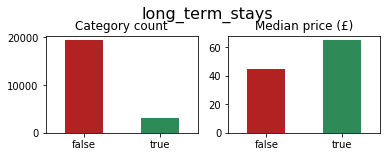

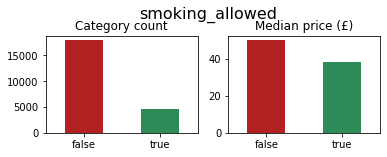

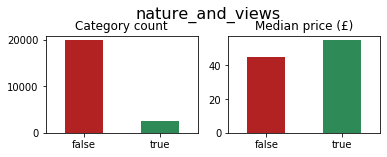

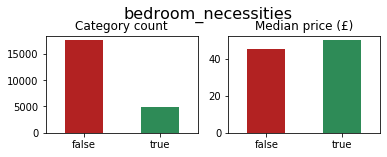

In [48]:
for col in df.iloc[:,43:-7].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

Answer: amenities can be split into four main groups:

Uncommon, but properties with it have a higher median price:

- Smoke detector
- Child friendly
- Coffee machine
- Tableware
- Elevator
- Fire Protection
- Parking 
- Host Greeting
- Long term stays
- Nature and views
- Bedroom Necessities

Most properties have it, and properties with it have a higher median price:

- Kitchen Basics

Uncommon, and properties with it have a lower median price:

- Smoking allowed
- Pets Allowed

About half the properties have it, with higher median price:

- Shower Necessities
- TV

Common and properite with it have lower median price:

- White goods

The conclusion we can form from this exploratory analysis of Airbnb amenities is that Airbnb hosts can increase the price of their listings by adding certain features to their listing. However, this is not a causal relationaship (i.e. having a view might imprice price, but listings with a view may be cheaper as they are less likely to be in the central boroughs of Berlin.

One important aspect is that hosts have necessities that their competitors have e.g. TV, Kitchen basics and safety measures(smoke detector, fire protection). Then the host can decide to further add features which they think might benefit the guest and therefore they would be able to increase the price of their listing without losing a significant amount of customers.


# Further Exploratory analysis

Text(0, 0.5, 'Price in $')

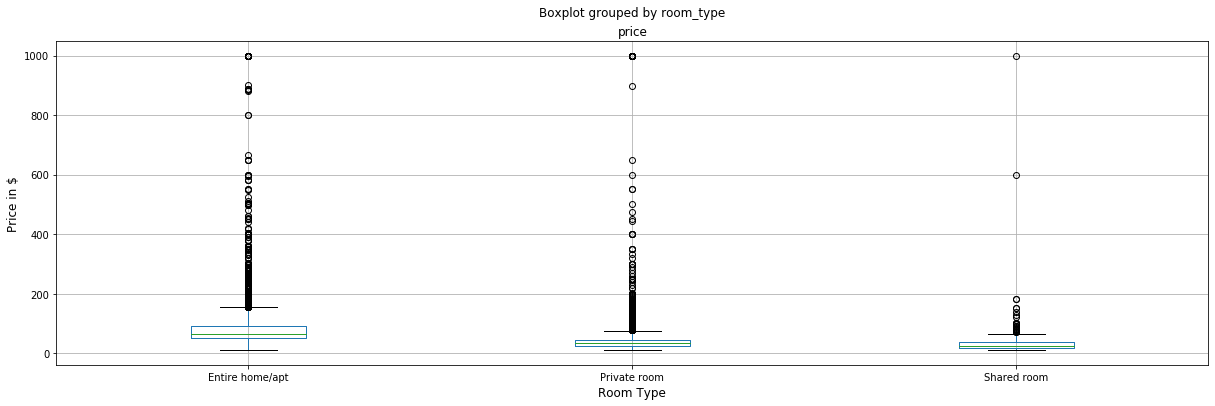

In [49]:
#Boxplot grouped by room type and resulting price 
df.boxplot(column = 'price', by = 'room_type', figsize=(20,6))
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price in $', fontsize=12)

Text(0.5, 1.0, 'Bedrooms and Price')

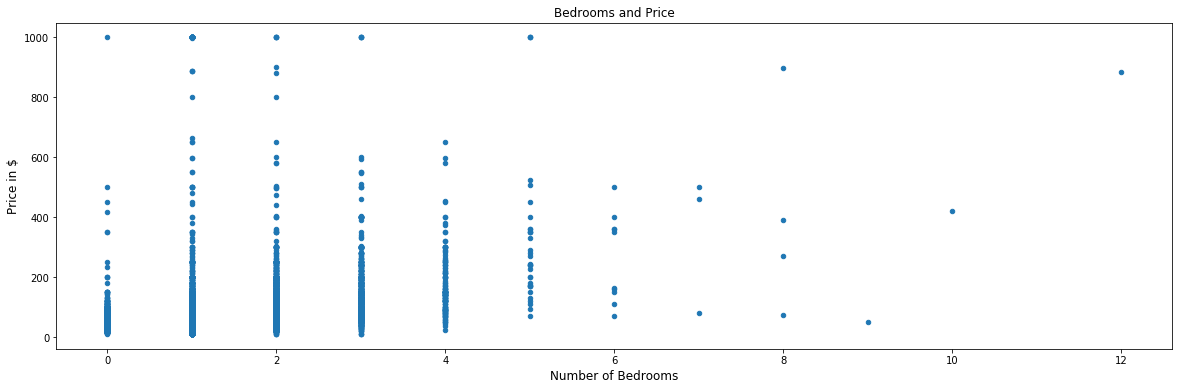

In [50]:
df.plot.scatter(x='bedrooms', y='price', figsize=(20,6))
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Price in $', fontsize=12)
plt.title('Bedrooms and Price', fontsize=12)

Text(0.5, 1.0, 'Price and Reviews')

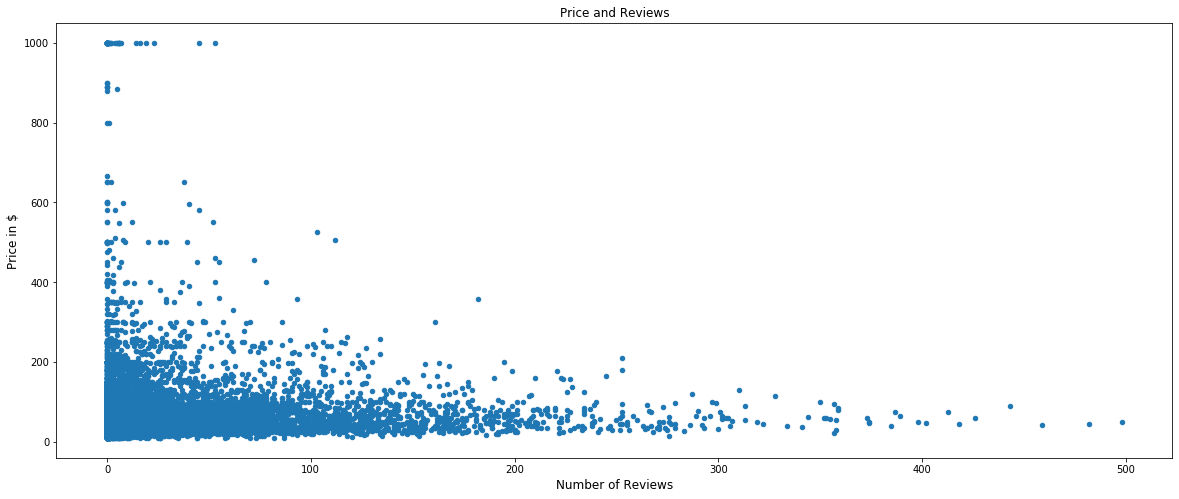

In [51]:
df.plot.scatter(x='number_of_reviews', y='price',figsize=(20,8))
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Price in $', fontsize=12)
plt.title('Price and Reviews', fontsize=12)

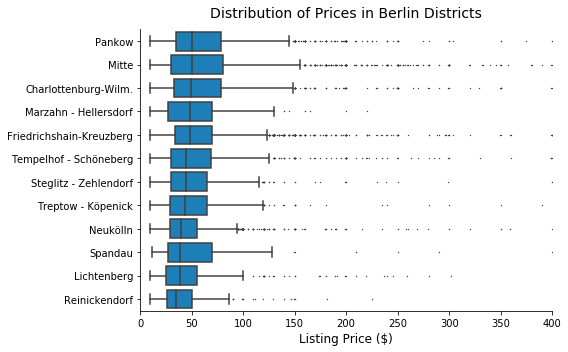

In [52]:
### Visualizing the result

plt.figure(figsize=(8,5))

flierprops = dict(markersize=0.5, linestyle='none', color="#f4f4f4")

sort_median = df.groupby("neighbourhood_group_cleansed")["price"].median().sort_values(ascending=False)

sns.boxplot(df["price"], df["neighbourhood_group_cleansed"], 
            orient="h", flierprops=flierprops, order=sort_median.index, color="#0485d1")

# setting x_limit to 400, because of many outliers
plt.xlim(0, 400)

plt.ylabel("")
plt.xlabel("Listing Price ($)", size=12)
plt.title("Distribution of Prices in Berlin Districts", size=14, pad=12)

sns.despine()
plt.tight_layout();

All the different district in Berlin show a surprisingly wide range of listing prices. For instance, in Berlin-Pankow prices go from 9 to 800 dollars. This wide price range could be explained by the many factors that influence the listing price, for example room number, apartment size etc. An additional explanation could be that the chosen districts (or neighborhood groups) are very large and diverse city areas comprised of very different smaller neighborhoods that might be more or less affluent. Pankow has the highest median listing price and Reinickendorf the lowest


One might get a better overview by looking at the 10% of the most expensive and least expensive listings repectively, and compare how they are distributed over the city:

In [53]:
### Analysing the data

# Defining the cutoffs to select the 10% of listings with the highest and lowest prices respectively
high_cutoff = df["price"].quantile(0.90)
low_cutoff = df["price"].quantile(0.10)

expensive_listings = df[df["price"] >= high_cutoff]
cheap_listings = df[df["price"] <= low_cutoff]

# Selecting the 10% of listings with the highest prices
extreme_prices = expensive_listings.groupby("neighbourhood_group_cleansed")["price"].count()
extreme_prices = extreme_prices.reset_index()
extreme_prices = extreme_prices.rename(columns={"price":"Expensive"})

# Adding the 10% of listings with the lowest prices to extreme_prices
low_prices = cheap_listings.groupby("neighbourhood_group_cleansed")["price"].count()
low_prices = low_prices.reset_index()
extreme_prices["Cheap"] = low_prices["price"]

# Transforming extreme_prices for the visualization
extreme_prices = extreme_prices.sort_values("Expensive", ascending=False)
extreme_prices = pd.melt(extreme_prices, id_vars="neighbourhood_group_cleansed", var_name="Category", value_name="Listings")

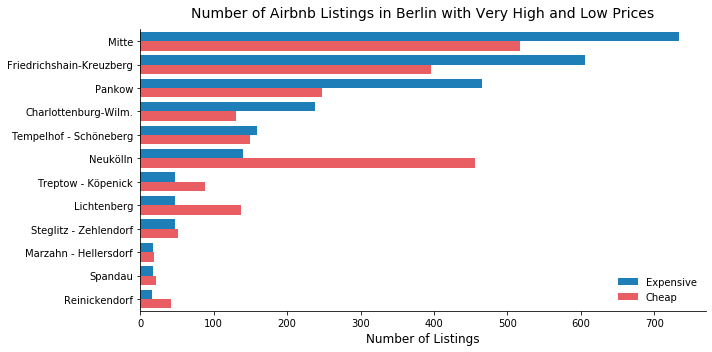

In [54]:
### Visualizing the result

plt.figure(figsize=(10,5))
sns.barplot(x='Listings', y='neighbourhood_group_cleansed', hue='Category', data=extreme_prices, 
            orient="h", palette=["#0485d1", "#ff474c"])

plt.ylabel("")
plt.xlabel("Number of Listings", size=12)
sns.despine()
plt.title("Number of Airbnb Listings in Berlin with Very High and Low Prices", size=14, pad=12)
plt.legend(frameon=False)
plt.tight_layout();

In [55]:
# We're going to look at appartements with at least one and max 8 beds
df = df[(df["beds"]<=8) & (df["beds"]>0)]
df["beds"] = df["beds"].astype(int)

price_per_beds = df.groupby(["neighbourhood_group_cleansed", "beds"])["price"].median().unstack()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


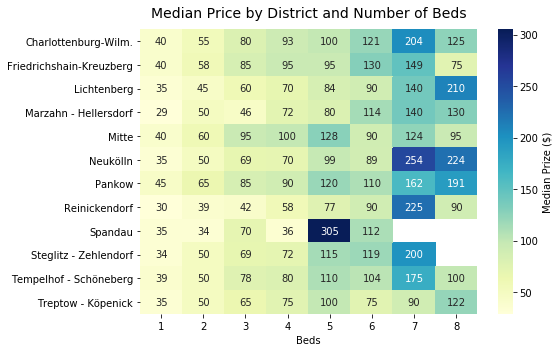

In [56]:
### Visualizing the result

plt.figure(figsize=(8,5))
sns.heatmap(price_per_beds, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Median Prize ($)'})
plt.xlabel("Beds")
plt.ylabel("")
plt.title("Median Price by District and Number of Beds", size=14, pad=12)
plt.tight_layout();

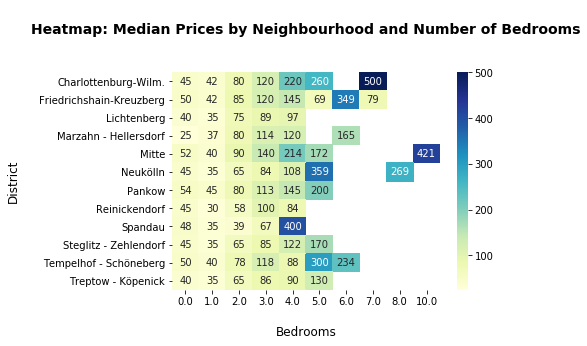

In [57]:
sns.heatmap(df.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.median().unstack(), 
            cmap='YlGnBu', annot=True, fmt=".0f")

plt.xlabel('\nBedrooms', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nHeatmap: Median Prices by Neighbourhood and Number of Bedrooms\n\n', fontsize=14, fontweight='bold');

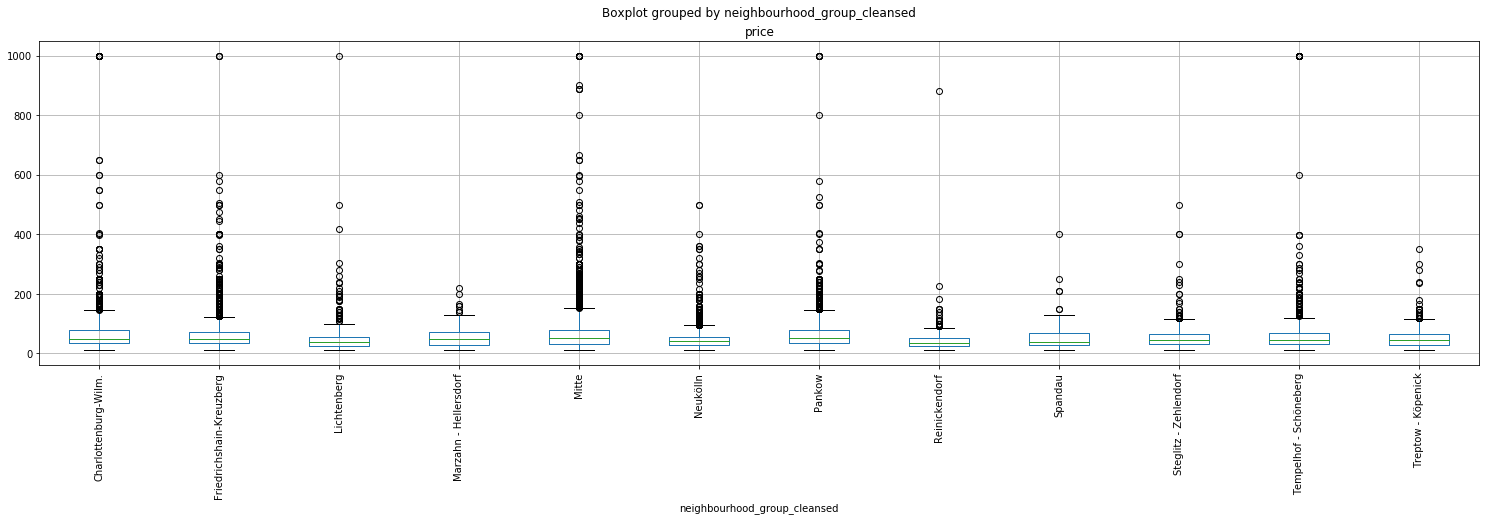

In [58]:
#Boxplot grouped by Neighbourhood Group and Price 
df.boxplot(column='price', by='neighbourhood_group_cleansed', figsize=(25,6), rot=90)

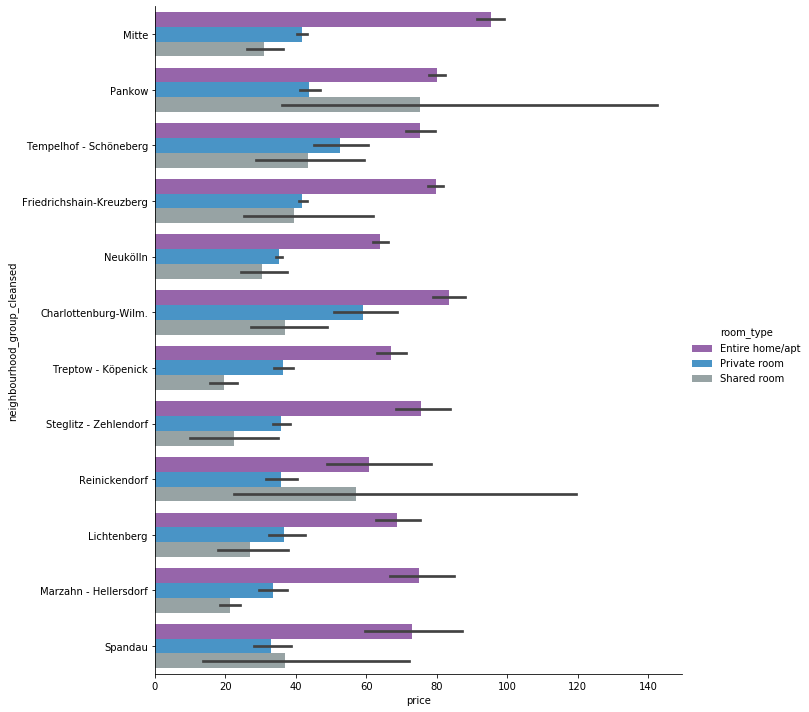

In [59]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.catplot(y="neighbourhood_group_cleansed", x="price", hue="room_type", data=df, palette = flatui, kind="bar", height=10)

In [60]:
# Check distriution of neighbourhood groups
hood_count = df["neighbourhood_group_cleansed"].value_counts().sum()
print((df["neighbourhood_group_cleansed"].value_counts().sort_values(ascending=False) / hood_count))

# Number of unique neighbourhood groups
print("\nThere are {} unique neighbourhood groups types within the data set.".format(len(df["neighbourhood_group_cleansed"].unique())))

Friedrichshain-Kreuzberg    0.243670
Mitte                       0.205020
Pankow                      0.157275
Neukölln                    0.155581
Charlottenburg-Wilm.        0.070569
Tempelhof - Schöneberg      0.069009
Lichtenberg                 0.030581
Treptow - Köpenick          0.026346
Steglitz - Zehlendorf       0.019437
Reinickendorf               0.010877
Marzahn - Hellersdorf       0.006241
Spandau                     0.005394
Name: neighbourhood_group_cleansed, dtype: float64

There are 12 unique neighbourhood groups types within the data set.


In [61]:
# Adjust values of "neighbourhood_group_cleansed"
df["neighbourhood_group_cleansed"] = df["neighbourhood_group_cleansed"].astype(str).str.replace("Charlottenburg-Wilm.", "Charlottenburg-Wilmersdorf")
df["neighbourhood_group_cleansed"] = df["neighbourhood_group_cleansed"].astype(str).str.replace(" ", "")

## Occupancy
Now, let's look at the occupancy rate of Airbnb listings.

In [62]:
# Data frame with area in square kilometre / neighbourhood groups
# Source: https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Ortsteile_Berlins
hood_names = ['Pankow','Tempelhof-Schöneberg','Friedrichshain-Kreuzberg','Neukölln','Mitte','Charlottenburg-Wilmersdorf',
              'Treptow-Köpenick','Lichtenberg','Reinickendorf','Steglitz-Zehlendorf','Marzahn-Hellersdorf','Spandau']
hood_size = [103.01,53.09,20.16,44.93,39.47,103.01,168.42,52.29,89.46,102.50,61.74,91.91]
hood_area = pd.DataFrame({"neighbourhood_group": hood_names, "area_km2": hood_size})
hood_area = hood_area.sort_values("neighbourhood_group").reset_index(drop=True)

In [63]:
# Create data frame with occupancy rate and listing density for each neighbourhood
# Grouping functions
f = {"Unnamed: 0":["count"], "occupancy_rate":["mean"]}

# Grouping data
hood_occupancy = df[["neighbourhood_group_cleansed","Unnamed: 0","occupancy_rate"]]
hood_occupancy = hood_occupancy.groupby("neighbourhood_group_cleansed", as_index=False).agg(f)
hood_occupancy.columns = ["neighbourhood_group", "num_listings", "occupancy_rate"]
hood_occupancy = hood_occupancy.sort_values("neighbourhood_group")


# Calculate density
hood_occupancy["area_km2"] = hood_area["area_km2"]
hood_occupancy["listings_per_km2"] = hood_occupancy["num_listings"] / hood_occupancy["area_km2"]
hood_occupancy.head()

,neighbourhood_group,num_listings,occupancy_rate,area_km2,listings_per_km2
0,Charlottenburg-Wilmersdorf,1583,0.518712,103.01,15.367440
1,Friedrichshain-Kreuzberg,5466,0.504148,20.16,271.130952
2,Lichtenberg,686,0.422121,52.29,13.119143
3,Marzahn-Hellersdorf,140,0.523129,61.74,2.267574
4,Mitte,4599,0.527085,39.47,116.518875


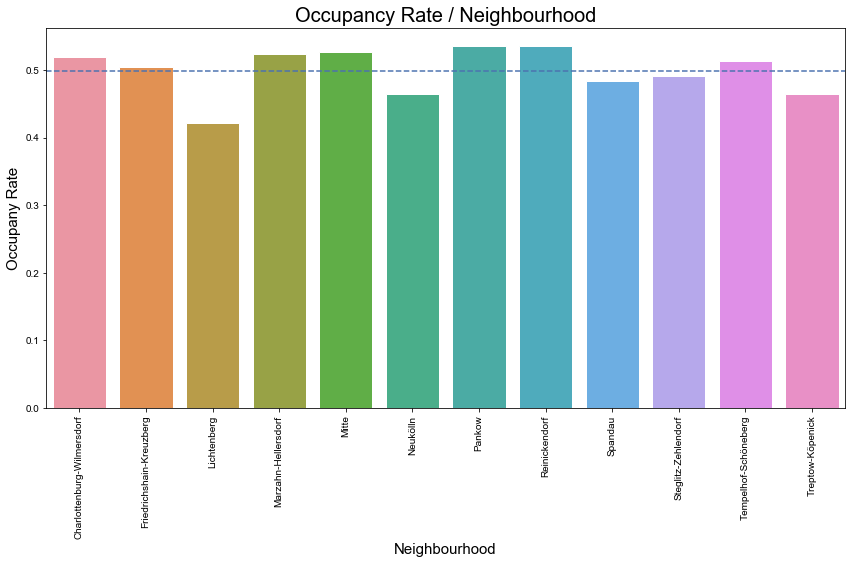

In [64]:
# Plot occupancy rate / neihbourhood group
plt.subplots(figsize=(12,8))
sns.set(style="white")
ax = sns.barplot(x="neighbourhood_group", y="occupancy_rate", data=hood_occupancy)
plt.xticks(rotation=90);
plt.title("Occupancy Rate / Neighbourhood", fontsize=20)
plt.ylabel("Occupany Rate", fontsize=15)
plt.xlabel("Neighbourhood", fontsize=15)
plt.tight_layout()

# Add median as reference line
ax.axhline(hood_occupancy ["occupancy_rate"].mean(), ls='--');

In [65]:
# Define adjusted proxy for number of bookings per months
df["max_bookings_per_month"] = (30.42 / df["minimum_nights"]).fillna(0)
df["bookings_per_month"] = df[["max_bookings_per_month","number_of_reviews"]].min(axis=1)
df = df.drop("max_bookings_per_month", axis=1)

df["bookings_per_month"].describe()

count    22432.000000
mean         6.363225
std          7.326950
min          0.000000
25%          1.000000
50%          4.000000
75%         10.140000
max         30.420000
Name: bookings_per_month, dtype: float64

In [66]:
# Calculate the monthly occupancy rate for each listing
df["occupancy_rate"] = (df["bookings_per_month"] * df["minimum_nights"] / 30.42).fillna(0)
df["occupancy_rate"].describe()

count    22432.000000
mean         0.505614
std          0.412425
min          0.000000
25%          0.098619
50%          0.394477
75%          1.000000
max          1.000000
Name: occupancy_rate, dtype: float64

## Number of listings per neighbourhood

In [67]:
# Number of listings / neighbourhood group
hood_count = df[["neighbourhood_group_cleansed","Unnamed: 0"]]
hood_count = hood_count.groupby("neighbourhood_group_cleansed", as_index=False).agg("count")
hood_count.columns = ["neighbourhood_group", "num_listings"]
hood_count.head()

,neighbourhood_group,num_listings
0,Charlottenburg-Wilmersdorf,1583
1,Friedrichshain-Kreuzberg,5466
2,Lichtenberg,686
3,Marzahn-Hellersdorf,140
4,Mitte,4599


In [68]:
# Data frame with area in square kilometre / neighbourhood groups
# Source: https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Ortsteile_Berlins
hood_names = ['Pankow','Tempelhof-Schöneberg','Friedrichshain-Kreuzberg','Neukölln','Mitte','Charlottenburg-Wilmersdorf',
              'Treptow-Köpenick','Lichtenberg','Reinickendorf','Steglitz-Zehlendorf','Marzahn-Hellersdorf','Spandau']
hood_size = [103.01,53.09,20.16,44.93,39.47,103.01,168.42,52.29,89.46,102.50,61.74,91.91]
hood_area = pd.DataFrame({"neighbourhood_group": hood_names, "area_km2": hood_size})
hood_area = hood_area.sort_values("neighbourhood_group").reset_index(drop=True)

In [69]:
hood_count["num_listings"].mean()

1869.3333333333333

In [70]:
# Add listing density to neighbourhood counts
hood_count["num_listings_per_km2"] = hood_count["num_listings"] / hood_area["area_km2"]

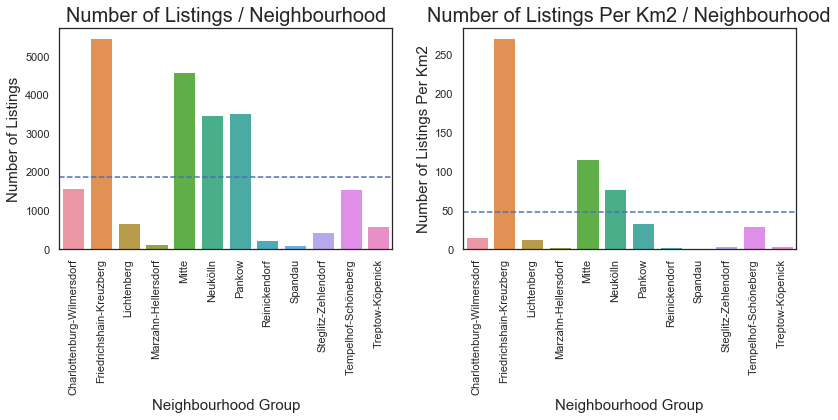

In [71]:
# Plot comparison
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.set(style = "white")
sns.barplot(x="neighbourhood_group", y="num_listings", data=hood_count, ax = ax[0])
sns.barplot(x="neighbourhood_group", y="num_listings_per_km2", data=hood_count, ax = ax[1])

# Format plot
ax[0].set_xticklabels(hood_count["neighbourhood_group"].values, rotation=90)
ax[0].set_ylabel("Number of Listings", fontsize=15)
ax[0].set_xlabel("Neighbourhood Group", fontsize=15)
ax[0].set_title("Number of Listings / Neighbourhood", fontsize=20)
ax[1].set_xticklabels(hood_count["neighbourhood_group"].values, rotation=90)
ax[1].set_ylabel("Number of Listings Per Km2", fontsize=15)
ax[1].set_xlabel("Neighbourhood Group", fontsize=15)
ax[1].set_title("Number of Listings Per Km2 / Neighbourhood", fontsize=20)
plt.tight_layout()

# Add mean as reference line
ax[0].axhline(hood_count["num_listings"].mean(), ls='--');
ax[1].axhline(hood_count["num_listings_per_km2"].mean(), ls='--');

The highest density of Airbnb apartments can be observed for Friedrichshain-Kreuzberg with over 250 listings per square kilometre followed by Mitte (around 110) and Neukölln (around 80). Especially when looking at Tempelhof-Schöneberg before and after the adjustment one can observe how it's relevance compared to Charlottenburg-Wilmersdorf as well as Pankow has largely increased. Pankow's listing density is now not even greater than the mean anymore.

## Popularity
Now, when combining listing density and occupancy rate we're able to compare Berlin neighbourhood groups regarding their popularity on Airbnb.

In [72]:
hood_occupancy.head()

,neighbourhood_group,num_listings,occupancy_rate,area_km2,listings_per_km2
0,Charlottenburg-Wilmersdorf,1583,0.518712,103.01,15.367440
1,Friedrichshain-Kreuzberg,5466,0.504148,20.16,271.130952
2,Lichtenberg,686,0.422121,52.29,13.119143
3,Marzahn-Hellersdorf,140,0.523129,61.74,2.267574
4,Mitte,4599,0.527085,39.47,116.518875


IndexError: invalid index to scalar variable.

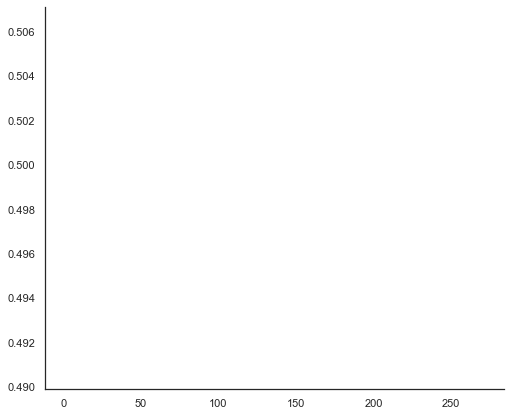

In [76]:
# Plot occupancy vs. listing count per square kilometre for neighbourhood groups
sns.set(style="white")
p = sns.lmplot("listings_per_km2", "occupancy_rate", data=hood_occupancy,
               hue="neighbourhood_group", fit_reg=False,
               height=6, aspect=1.2, scatter_kws={"s": 250})

# Add mean as reference line
plt.axhline(hood_occupancy["occupancy_rate"].mean(), ls='--');
plt.axvline(hood_occupancy["listings_per_km2"].mean(), ls='--');

# Set labels
plt.title("Popularity of Airbnb Listings Across Berlin Neighbourhood Groups", fontsize=20)
plt.ylabel("Occupancy Rate", fontsize=15)
plt.xlabel("Number of Listings Per Square Kilometre", fontsize=15)
p._legend.set_title("Neighbourhood Groups")
plt.setp(p._legend.get_title(), fontsize=15);

The graph above shows how both listing density and occupancy rate are related to each other. Considering both variables now it appears that Mitte and Friedrichshain-Kreuzberg are the most popular neighbourhood group of Berlin on Airbnb. They are the neighbourhood groups showing both listings density and occupancy rate being above average. Eventhough a higher listing density can easily result in higher competition between Airbnb home owners, thus leading to lower occupancy rates on average. Nonetheless, Mitte and Friedrichshain-Kreuzberg still seems to be able to perform on both scales.

In [73]:
# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(df.groupby('borough').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['median_price'] = df.groupby('borough').price.median().values
borough_df

,number_of_listings,median_price
borough,,
Adlershof,27,40.0
Albrechtstr.,102,40.0
Alexanderplatz,1086,67.5
Allende-Viertel,3,26.0
Alt Treptow,169,44.0
...,...,...
Wilhelmstadt,32,36.0
Zehlendorf Nord,66,57.5
Zehlendorf Südwest,40,64.5


In [74]:
# Joining the dataframes
borough_map_df = map_df.set_index('neighbourhood').join(borough_df)

# Having a look at the newly created dataframe and sorting by number of listings in a borough
borough_map_df.sort_values('number_of_listings').tail(10)

,neighbourhood_group,geometry,number_of_listings,median_price
Neuköllner Mitte/Zentrum,Neukölln,"MULTIPOLYGON (((13.44810 52.46457, 13.44821 52...",795.0,37.0
Rixdorf,Neukölln,"MULTIPOLYGON (((13.45859 52.48552, 13.45844 52...",879.0,35.0
Reuterstraße,Neukölln,"MULTIPOLYGON (((13.43515 52.48076, 13.43492 52...",997.0,43.0
Alexanderplatz,Mitte,"MULTIPOLYGON (((13.40559 52.52967, 13.40721 52...",1086.0,67.5
Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg,"MULTIPOLYGON (((13.46965 52.50223, 13.46954 52...",1277.0,47.0
Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,"MULTIPOLYGON (((13.40736 52.48605, 13.40703 52...",1316.0,50.0
Forst Grunewald,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.23830 52.46917, 13.23777 52...",NaN,NaN
Marzahn-Nord,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.54447 52.56685, 13.54458 52...",NaN,NaN
NaN,None,"MULTIPOLYGON (((13.61659 52.58154, 13.61458 52...",NaN,NaN
NaN,None,"MULTIPOLYGON (((13.61668 52.57868, 13.60703 52...",NaN,NaN


In [75]:
#Sorting the dataframe according to median price
borough_map_df.sort_values('median_price').tail(10)

,neighbourhood_group,geometry,number_of_listings,median_price
Brunnenstr. Süd,Mitte,"MULTIPOLYGON (((13.37492 52.53732, 13.37613 52...",770.0,68.0
Kurfürstendamm,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30611 52.50191, 13.30552 52...",120.0,69.5
Rahnsdorf/Hessenwinkel,Treptow - Köpenick,"MULTIPOLYGON (((13.73141 52.41976, 13.73134 52...",28.0,73.5
Regierungsviertel,Mitte,"MULTIPOLYGON (((13.39724 52.52200, 13.39666 52...",211.0,77.0
Spandau Mitte,Spandau,"MULTIPOLYGON (((13.24667 52.52832, 13.24636 52...",19.0,91.0
Haselhorst,Spandau,"MULTIPOLYGON (((13.21109 52.54379, 13.21234 52...",3.0,210.0
Forst Grunewald,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.23830 52.46917, 13.23777 52...",NaN,NaN
Marzahn-Nord,Marzahn - Hellersdorf,"MULTIPOLYGON (((13.54447 52.56685, 13.54458 52...",NaN,NaN
NaN,None,"MULTIPOLYGON (((13.61659 52.58154, 13.61458 52...",NaN,NaN
NaN,None,"MULTIPOLYGON (((13.61668 52.57868, 13.60703 52...",NaN,NaN
